In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, 
                             ConfusionMatrixDisplay)

# Loading the news article dataset
file_path = 'news-article-categories clean.csv'
data = pd.read_csv(file_path)

#Combining text features into one
data['text'] = data['title'] + " " + data['body']

#Check the missing values and if necessary drop them
data = data.dropna(subset=['text', 'category'])

# Split the data into features and target
X = data['text']      # Combined the text feature
y = data['category']  # target labels

#Tf-idfVectorizer for the text vectorization
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

print("Data preprocessed and vectorized.")


C:\Users\zobayer\AppData\Local\Temp\ipykernel_10768\1343803908.py:12: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

Data preprocessed and vectorized.



Initaial Accuracy with Decision Tree: 47.88%

Evaluation Metrics (Initaial Predictions):
Precision: 48.24%
Recall:    47.88%
F1 Score:  48.02%

Classification Report:
                precision    recall  f1-score   support

ARTS & CULTURE       0.59      0.58      0.59      1002
      BUSINESS       0.36      0.36      0.36       501
        COMEDY       0.51      0.48      0.49       376
         CRIME       0.42      0.43      0.43       300
     EDUCATION       0.68      0.65      0.67       490
 ENTERTAINMENT       0.32      0.36      0.34       501
   ENVIRONMENT       0.46      0.51      0.49       501
         MEDIA       0.29      0.30      0.30       347
      POLITICS       0.44      0.43      0.43       501
      RELIGION       0.55      0.54      0.55       501
       SCIENCE       0.54      0.51      0.53       350
        SPORTS       0.56      0.54      0.55       501
          TECH       0.44      0.42      0.43       501
         WOMEN       0.41      0.43      0.42  

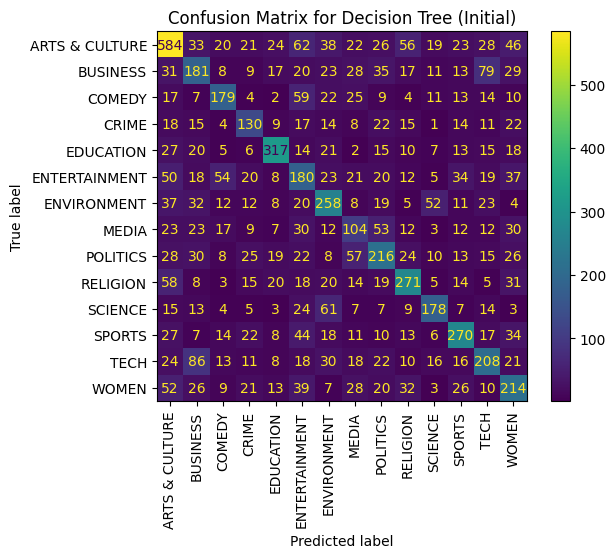

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation (5-folds)
cv_scores = cross_val_score(model, X_vectorized, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(model, X_vectorized, y, cv=5)

# Compute cross-validation metrics
average_accuracy = cv_scores.mean()

print(f"\nInitaial Accuracy with Decision Tree: {average_accuracy * 100:.2f}%")

# Evaluate predictions from cross-validation
precision = precision_score(y, cv_predictions, average='weighted', zero_division=0)
recall = recall_score(y, cv_predictions, average='weighted', zero_division=0)
f1 = f1_score(y, cv_predictions, average='weighted', zero_division=0)

print("\nEvaluation Metrics (Initaial Predictions):")
print(f"Precision:{precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score:{f1 * 100:.2f}%")

#classification report
print("\nClassification Report:")
print(classification_report(y, cv_predictions, target_names=data['category'].unique(), zero_division=0))

#confusion matrix
ConfusionMatrixDisplay.from_predictions(y,cv_predictions,xticks_rotation='vertical')
plt.title("Confusion Matrix for Decision Tree (Initial)")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#parameter distribution
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']}

# RandomizedSearchCV for hyperparameter tuning
random_search =RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # random combinations
    cv=3,     # 3-fold cross-validation
    n_jobs=-1,  # Use all available processors
    verbose=2, scoring='accuracy',
    random_state=42)

#Fiting RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# best parameters
best_model =random_search.best_estimator_
print("\nBest Parameters from RandomizedSearchCV:")
print(random_search.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best Parameters from RandomizedSearchCV:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8}



Evaluation Metrics for Tuned Model:
Accuracy:  50.55%
Precision: 50.43%
Recall:    50.55%
F1 Score:  50.30%

Classification Report for tuned Dicission Tree model:
                precision    recall  f1-score   support

ARTS & CULTURE       0.52      0.60      0.56       205
      BUSINESS       0.45      0.41      0.43       114
        COMEDY       0.56      0.59      0.58        74
         CRIME       0.50      0.56      0.53        57
     EDUCATION       0.61      0.66      0.63       108
 ENTERTAINMENT       0.46      0.41      0.43       100
   ENVIRONMENT       0.49      0.42      0.46        97
         MEDIA       0.36      0.31      0.34        67
      POLITICS       0.43      0.50      0.46       103
      RELIGION       0.61      0.58      0.60       101
       SCIENCE       0.58      0.41      0.48        54
        SPORTS       0.60      0.60      0.60       101
          TECH       0.44      0.45      0.44        85
         WOMEN       0.43      0.40      0.42      

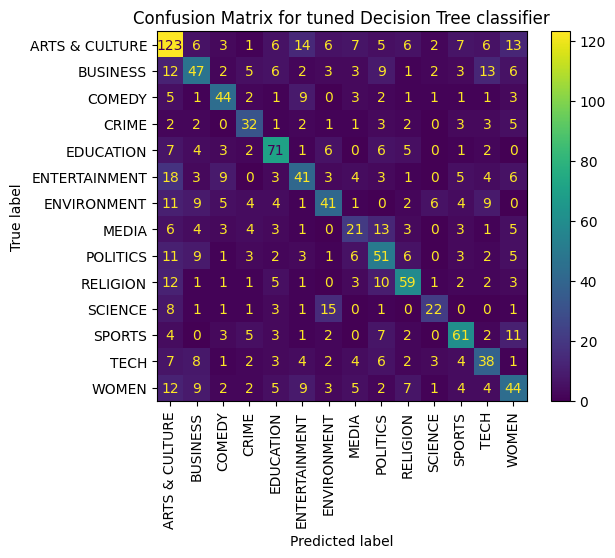

In [9]:
# Predict using the best model
y_pred = best_model.predict(X_test)

#Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall =recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted',zero_division=0)

print("\nEvaluation Metrics for Tuned Model:")
print(f"Accuracy:{accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

#Classification report
print("\nClassification Report for tuned Dicission Tree model:")
print(classification_report(y_test,y_pred, target_names=data['category'].unique(),zero_division=0))

#Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test,y_test,xticks_rotation='vertical')
plt.title("Confusion Matrix for tuned Decision Tree classifier")
plt.show()


In [6]:
# Save result into a CSV file
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred})

output_file = 'decision_tree_results_with_random_search.csv'
results.to_csv(output_file, index=False)
print(f"Results saved to '{output_file}'")


Results saved to 'decision_tree_results_with_random_search.csv'
